In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/CICIDS2017_sample.csv')

In [ ]:
dataset=pd.DataFrame(df)

In [ ]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [ ]:
df.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PS

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Label' is the column you want to encode
label_encoder = LabelEncoder()

In [ ]:
df['Label'].value_counts()

,count
Label,
BENIGN,22731
DoS,19035
PortScan,7946
BruteForce,2767
WebAttack,2180
Bot,1966
Infiltration,36


In [ ]:
label_encoder.fit(df['Label'])


LabelEncoder()

In [ ]:
# Check the mapping of labels to numerical values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'BENIGN': 0, 'Bot': 1, 'BruteForce': 2, 'DoS': 3, 'Infiltration': 4, 'PortScan': 5, 'WebAttack': 6}


In [ ]:
# Transform the 'Label' column in the dataframe with the encoded values
df['Label'] = label_encoder.transform(df['Label'])

In [ ]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
df.isnull().sum()

,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
Total Length of Bwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


<Axes: >

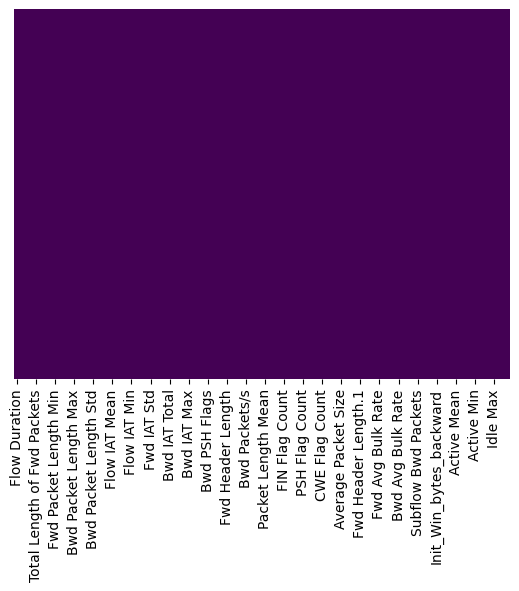

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Exploratory Data Analysis**

Correlation-Matrix

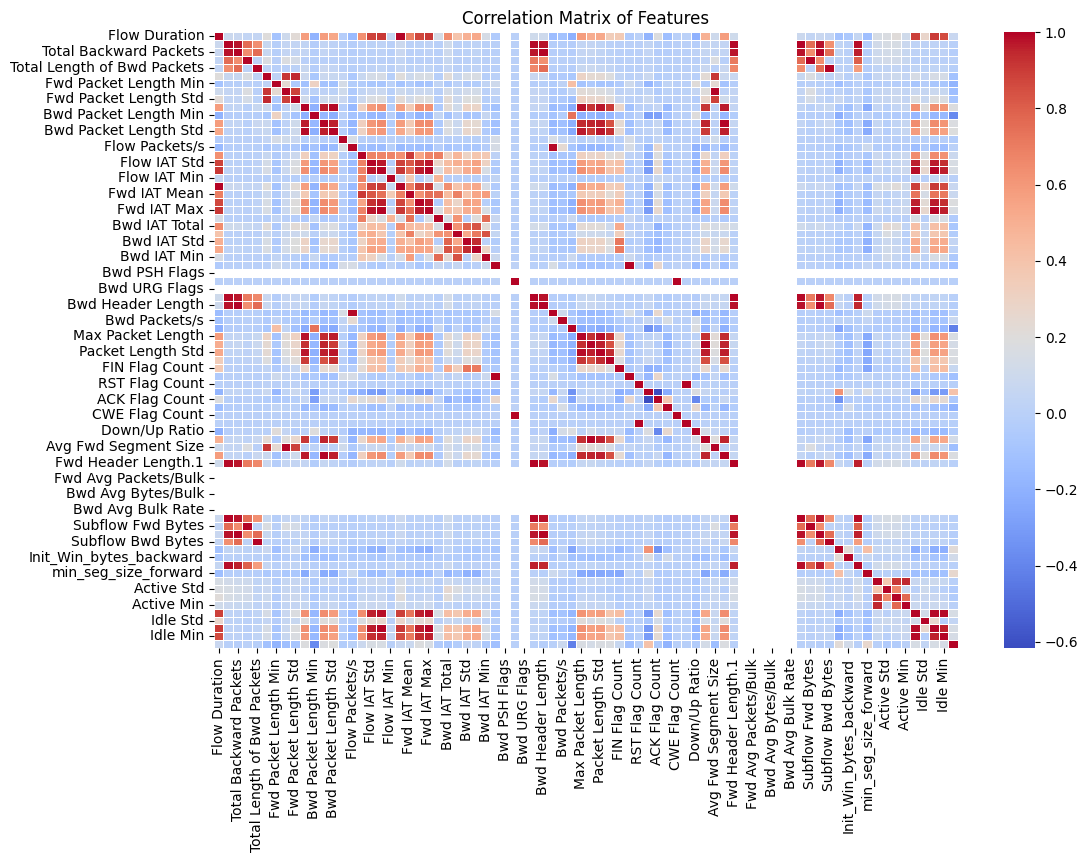

In [ ]:

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


Box-Plot for Flow Duration v/s Labels

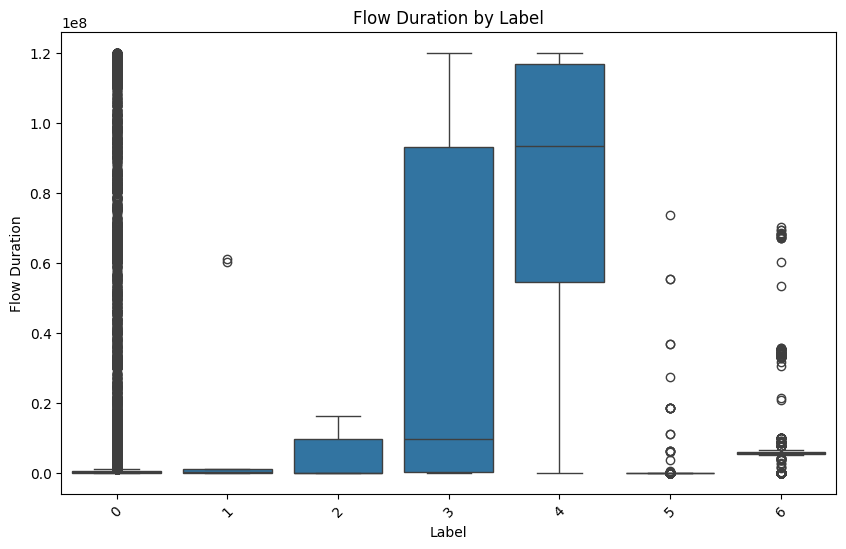

In [ ]:
# Boxplot for one feature (e.g., Flow Duration) across different labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Flow Duration', data=df)
plt.title('Flow Duration by Label')
plt.xticks(rotation=45)
plt.show()

PairPlot for Imp Features

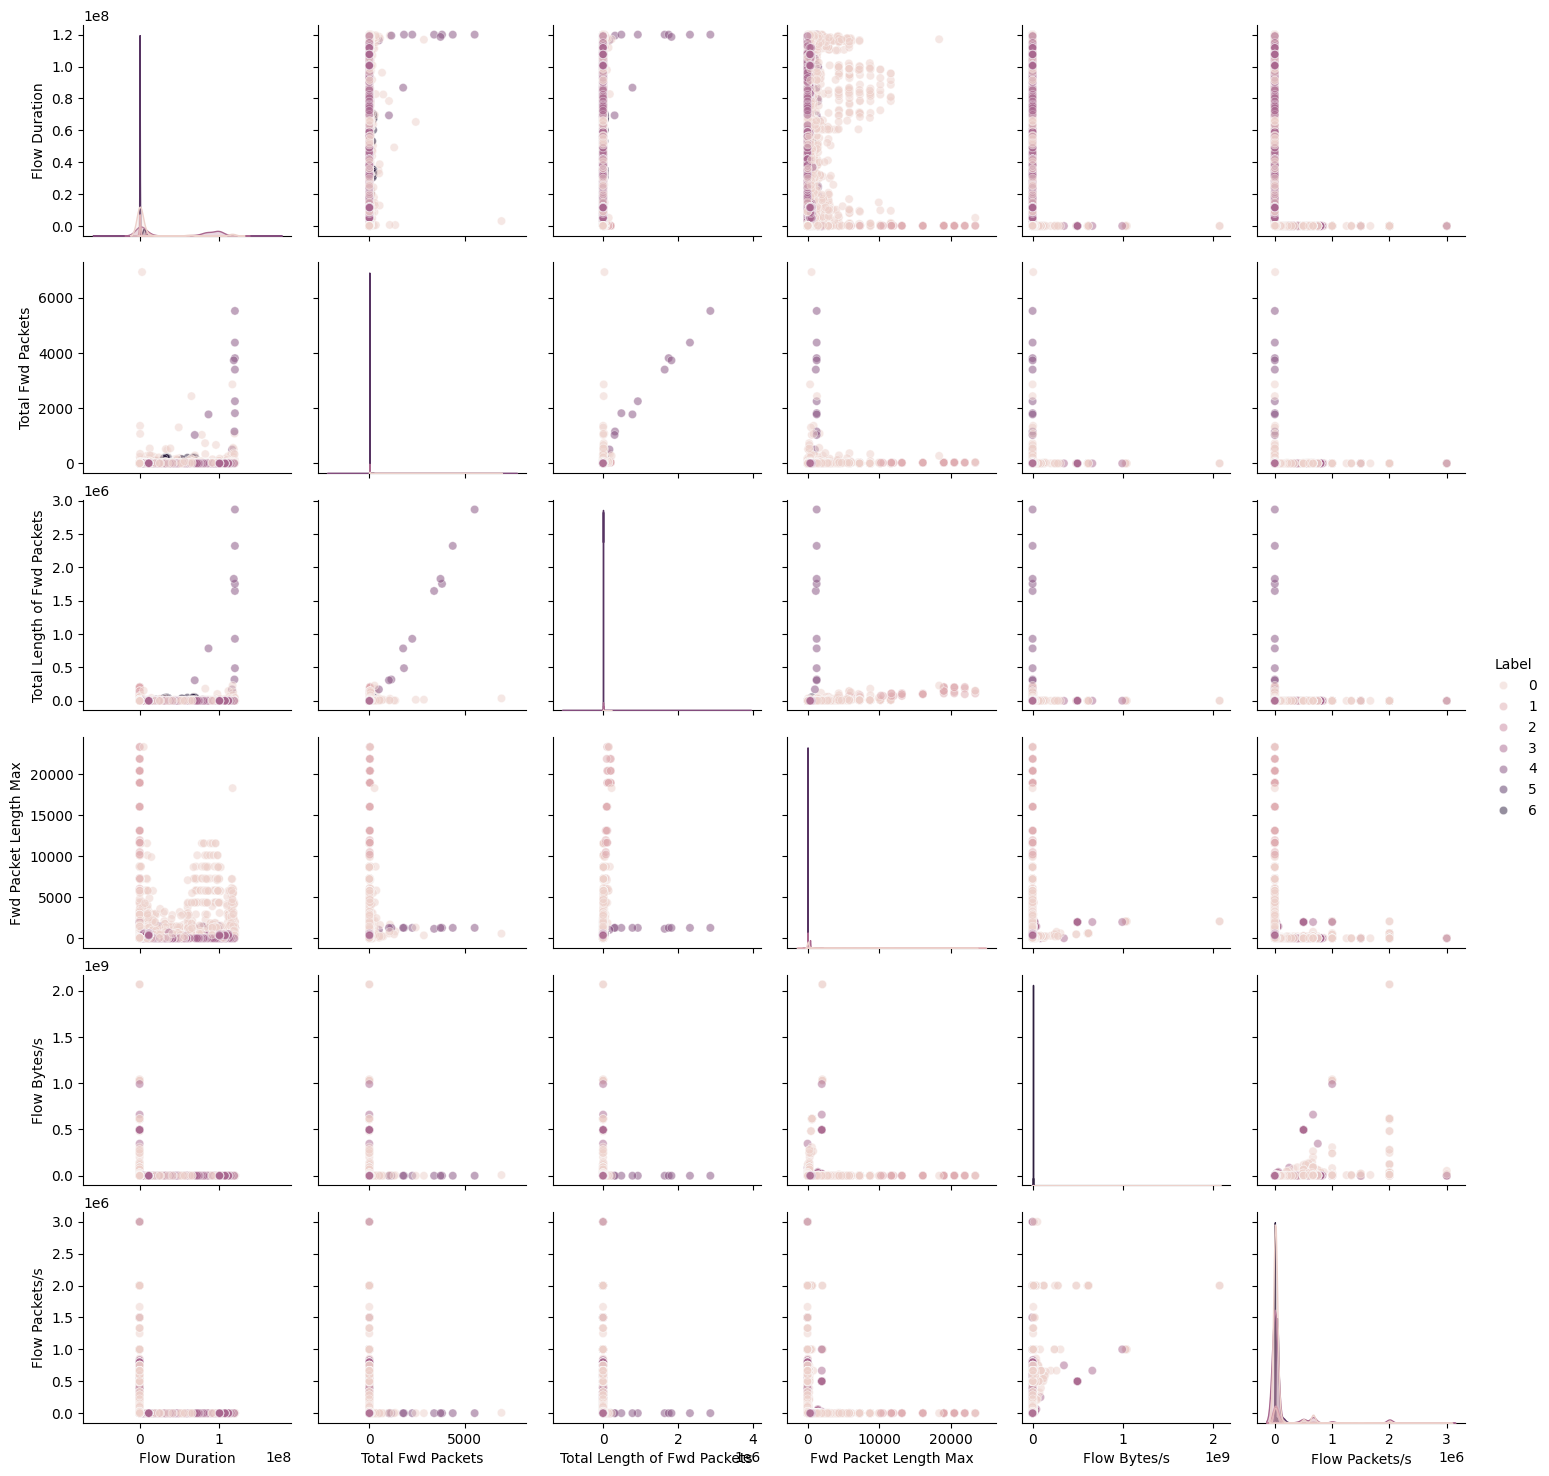

In [ ]:
# Select a subset of important features and the label
important_features = ['Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Flow Bytes/s', 'Flow Packets/s']
subset_df = df[important_features + ['Label']]

# Plot pairplot
sns.pairplot(subset_df, hue='Label', plot_kws={'alpha':0.5})
plt.show()


**Model Training and Testing**

Logistic Regression,Random Forest,SVM,KNN,Naive Bayes,Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [ ]:
# Select the important features
important_features = ['Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets',
                      'Fwd Packet Length Max', 'Flow Bytes/s', 'Flow Packets/s']

Train-Test Split

In [ ]:
# Split data into features (X) and target (y)
X = df[important_features]
y = df['Label']

In [ ]:
# Replace inf values with NaN (so they can be imputed)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

<ipython-input-23-0b9193b72abb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer
# Impute missing values with median for numerical features
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [ ]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# List of models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(gb, param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluate model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Test Accuracy: 0.9624988970263831


--- Logistic Regression ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.4876
Precision: 0.4410
Recall: 0.4876
Confusion Matrix:
[[2105    0    0 2399    0    0    0]
 [ 138    0    0  274    0    0    0]
 [  56    0    0  461    0    0    0]
 [ 436    0    0 3421    0    0    0]
 [   0    0    0   14    0    0    0]
 [   3    0    0 1556    0    0    0]
 [   0    0    0  470    0    0    0]]


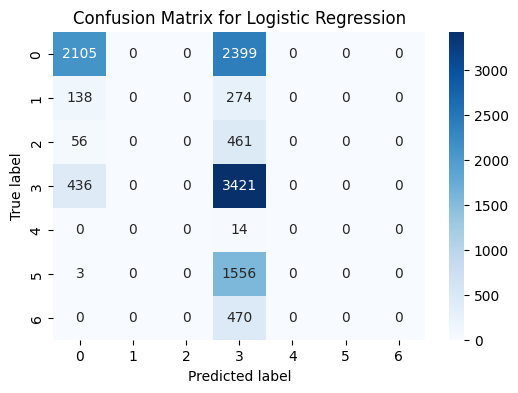



--- Random Forest ---
Accuracy: 0.9586
Precision: 0.9587
Recall: 0.9586
Confusion Matrix:
[[4259   60   50  105    0    9   21]
 [  47  365    0    0    0    0    0]
 [  45    0  470    2    0    0    0]
 [  41    0    0 3816    0    0    0]
 [   6    0    0    0    8    0    0]
 [   1    0    0    1    0 1557    0]
 [  70    0    9    2    0    0  389]]


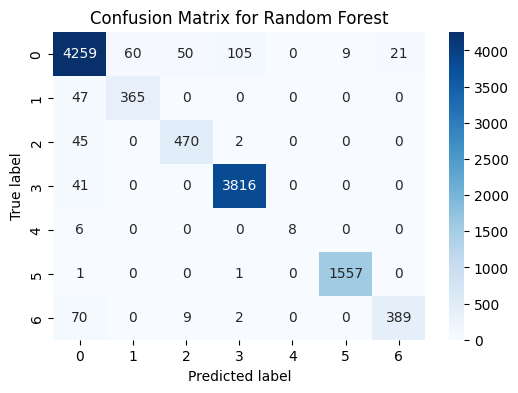



--- SVM ---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5439
Precision: 0.4205
Recall: 0.5439
Confusion Matrix:
[[4040    0    0  464    0    0    0]
 [ 412    0    0    0    0    0    0]
 [ 262    0    0  255    0    0    0]
 [1733    0    0 2124    0    0    0]
 [   6    0    0    8    0    0    0]
 [1553    0    0    6    0    0    0]
 [  64    0    0  406    0    0    0]]


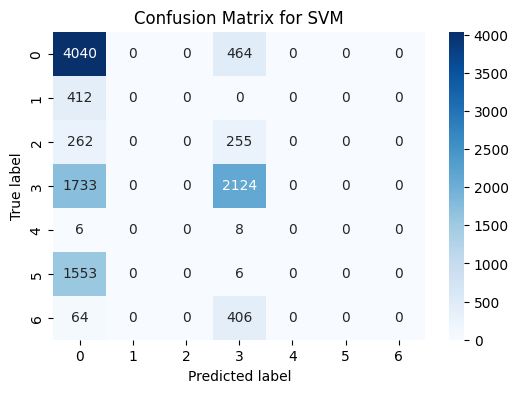



--- K-Nearest Neighbors ---
Accuracy: 0.8608
Precision: 0.8616
Recall: 0.8608
Confusion Matrix:
[[3782  102   83  383    0   29  125]
 [ 101  311    0    0    0    0    0]
 [  82    1  360   70    0    1    3]
 [ 289    3   85 3436    0    4   40]
 [   5    0    0    8    1    0    0]
 [   3    0    3    6    0 1547    0]
 [ 106    0   14   31    0    0  319]]


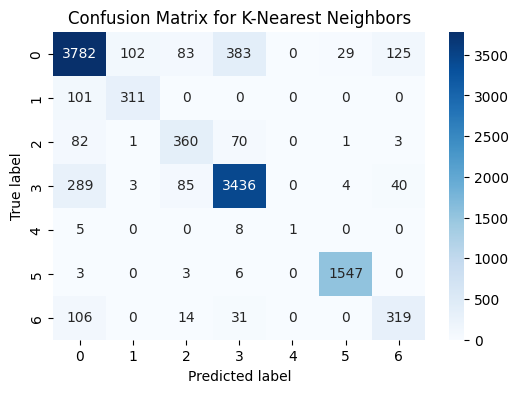



--- Naive Bayes ---
Accuracy: 0.3430
Precision: 0.6667
Recall: 0.3430
Confusion Matrix:
[[  69   18  265  632   34 2199 1287]
 [   0    8    6   13    0  267  118]
 [   0    0    0   46    0  111  360]
 [   5    0  300 1844    0  789  919]
 [   2    0    0    1   11    0    0]
 [   0    0    6   15    0 1527   11]
 [   0    0    0    0   23   19  428]]


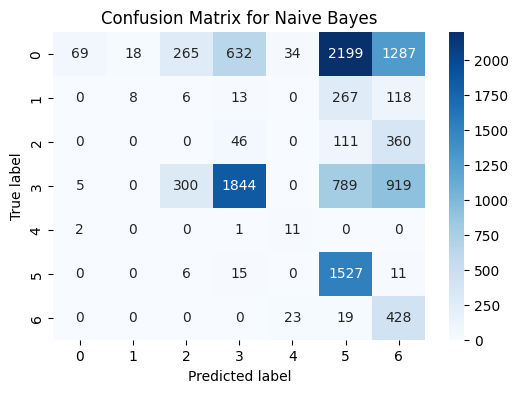



--- Decision Tree ---
Accuracy: 0.9549
Precision: 0.9548
Recall: 0.9549
Confusion Matrix:
[[4230   55   59  122    2    8   28]
 [  51  361    0    0    0    0    0]
 [  45    0  470    1    0    1    0]
 [  48    0    0 3806    0    1    2]
 [   5    0    0    0    9    0    0]
 [   2    0    0    1    0 1556    0]
 [  68    0    9    3    0    0  390]]


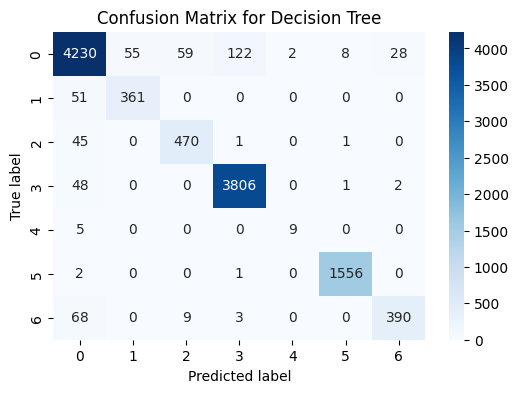



--- XGBoost ---
Accuracy: 0.9661
Precision: 0.9662
Recall: 0.9661
Confusion Matrix:
[[4286   51   46   89    0    9   23]
 [  41  371    0    0    0    0    0]
 [  39    0  478    0    0    0    0]
 [  30    0    0 3827    0    0    0]
 [   6    0    0    0    8    0    0]
 [   2    0    0    1    0 1556    0]
 [  35    0   11    1    0    0  423]]


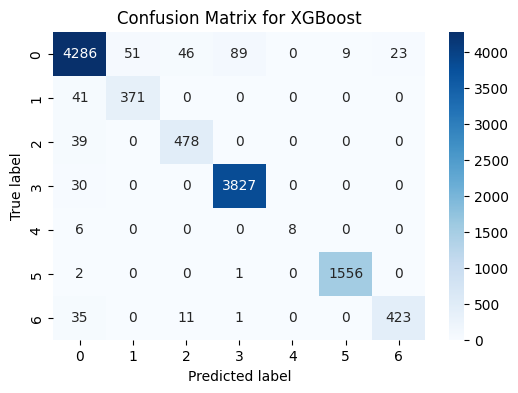

In [ ]:
# Dictionary to store predictions from each model
predictions_dict = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"--- {model_name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store predictions in the dictionary
    predictions_dict[model_name] = y_pred

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print("\n")

In [ ]:
# Create a DataFrame to compare actual values with predictions from all models
results_df = pd.DataFrame({'Actual': y_test})

# Add the predictions from each model to the DataFrame
for model_name, predictions in predictions_dict.items():
    results_df[model_name + '_Prediction'] = predictions

# Display the comparison DataFrame
print(results_df)

       Actual  Logistic Regression_Prediction  Random Forest_Prediction  \
12966       5                               3                         5   
34933       0                               3                         0   
44795       3                               3                         3   
11466       5                               3                         5   
19246       1                               0                         1   
...       ...                             ...                       ...   
25250       0                               0                         0   
2856        3                               3                         3   
11619       5                               3                         5   
42884       3                               3                         3   
37159       0                               0                         0   

       SVM_Prediction  K-Nearest Neighbors_Prediction  Naive Bayes_Prediction  \
12966             

In [ ]:
results_df.to_csv('/content/model_predictions_comparison.csv', index=False)

In [ ]:
results_df

,Actual,Logistic Regression_Prediction,Random Forest_Prediction,SVM_Prediction,K-Nearest Neighbors_Prediction,Naive Bayes_Prediction,Decision Tree_Prediction,XGBoost_Prediction
12966,5,3,5,0,5,5,5,5
34933,0,3,0,0,0,6,0,0
44795,3,3,3,3,3,3,3,3
11466,5,3,5,0,5,5,5,5
19246,1,0,1,0,1,5,1,1
...,...,...,...,...,...,...,...,...
25250,0,0,0,0,0,5,0,0
2856,3,3,3,0,3,5,3,3
11619,5,3,5,0,5,5,5,5
42884,3,3,3,3,3,3,3,3
